In [1]:
import numpy as np

import matplotlib.pyplot as plt

import shap

from catboost import CatBoostClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report



In [2]:
# Generate synthetic dataset

X,y = make_classification(
    n_samples = 10000,
    n_features=10,
    random_state=42
)

In [3]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [4]:
# Train an CatBoost model

cat_model = CatBoostClassifier(
              iterations = 300, 
              depth =6, 
              learning_rate = 0.05, 
              verbose =100
              )

In [5]:
# Fit the model

cat_model.fit(X_train,y_train)

0:	learn: 0.6353176	total: 57.2ms	remaining: 17.1s
100:	learn: 0.1768024	total: 255ms	remaining: 502ms
200:	learn: 0.1521895	total: 452ms	remaining: 223ms
299:	learn: 0.1337871	total: 652ms	remaining: 0us


In [6]:
# Predict with trained model

y_pred = cat_model.predict(X_test)

In [7]:
# Evaluate accuracy

accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy Score : {accuracy:.4f}")

Accuracy Score : 0.9440


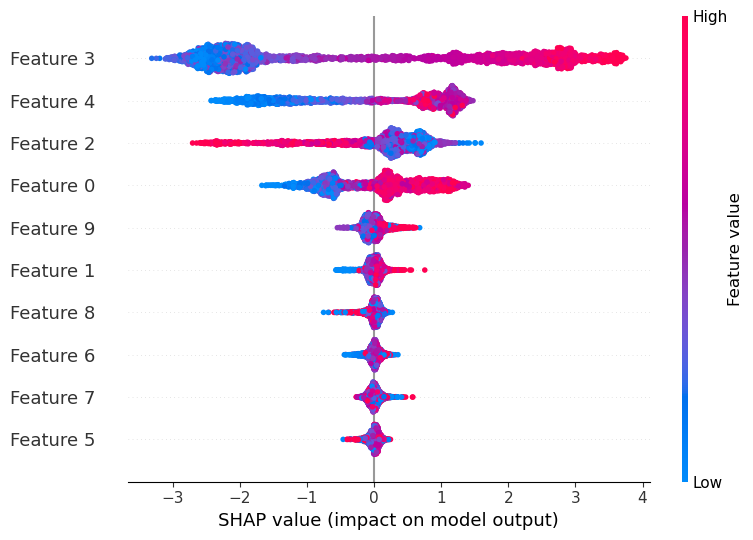

In [8]:
# Iportance 

explainer = shap.Explainer(cat_model)

shap_values = explainer(X_test)

shap.summary_plot(shap_values,X_test)